# Data 620 - Project 2
Week 4 Project 2 - Summer 2021
Author: Layla Quinones
Group Members: Maliat Islam, & Karim Hammoud

## Assignment
<ol>
    <li>Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.</li>
    <li>Reduce the size of the network using a What can you infer about each of the distinct groups?method such as the island method described in chapter 4 of social network analysis.</li>
    <li>What can you infer about each of the distinct groups?</li>
</ol>

## Introduction
- What data did we choose and why? Where did you get it from? How was it gathered? Describe how it fullfills the requirements - Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

What are bipartite networks? Why are they important?
- nodes are divided into two sets
- nodes cannot connect to other nodes in its same set, it must connect only to a node in the other set



## Data Importing & Pre Processing
- source of data
- format of data
- description of data
- what does each node mean
- edges?

In [69]:
#Import libraries
import pandas as pd
import networkx as nx
import pylab as plt

#import data into dataframe from github link
rawData = pd.read_csv("https://raw.githubusercontent.com/akarimhammoud/DATA-620/main/Week_4_project_2/IMDB-Movie-Data.csv", sep =',') 
rawData.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Describe the data - how many observations, what information is there.

We are interested in creating a 2-Mode network with actors and movies as nodes.

In [70]:
#dataframe with movie and actors only
movieActorRaw = rawData[['Title','Actors']]
movieActorRaw.head()

,Title,Actors
0,Guardians of the Galaxy,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S..."
1,Prometheus,"Noomi Rapace, Logan Marshall-Green, Michael Fa..."
2,Split,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar..."
3,Sing,"Matthew McConaughey,Reese Witherspoon, Seth Ma..."
4,Suicide Squad,"Will Smith, Jared Leto, Margot Robbie, Viola D..."


In [71]:
#seperate the Actors column and Title column
actors = list(rawData.Actors)
movies = list(rawData.Title)

In [72]:
#split each element in actors into a list
for i in range(len(actors)):
    actors[i] = actors[i].split(',')

In [73]:
#create a dictionary with movies and actors
dictionary = dict(zip(movies, actors))

In [74]:
#create a edgelist out of the dictionary
#create a DF from dict
imdbDF = pd.DataFrame.from_dict(dictionary, orient = 'index')
#create new DF with dict keys as rows and values as columns
imdbDF = pd.DataFrame(list(zip(list(imdbDF.T.keys()), list(imdbDF[0]), list(imdbDF[1]), list(imdbDF[2]), list(imdbDF[3]))), columns = ['Title', 'One', 'Two', 'Three', 'Four'])
#Pivot from wide to long format (With titles repeating)
imdbDF = pd.melt(imdbDF, id_vars=['Title'], value_vars=['One', 'Two', 'Three', 'Four'])
imdbDF = imdbDF[['Title','value']]
imdbDF = imdbDF.rename(columns = {'value': 'Actor'})
imdbDF.head()

,Title,Actor
0,Guardians of the Galaxy,Chris Pratt
1,Prometheus,Noomi Rapace
2,Split,James McAvoy
3,Sing,Matthew McConaughey
4,Suicide Squad,Will Smith


## Network Creation

Since the data we are working with is split into two groups, we can generate a bipartite graph that can help us gather more insight about the relationships between actors based on the movies they have worked in. Below we generated a undirected network graph and a bipartite network graph, and took some general metrics to get a better sense of how to reduce or subset the data for more in depth analysis. We chose to add attributes of 'director' and 'year' to each movie node so that we can include as much information about the nodes as possible.

In [75]:
#generate a list with all unique actors 
uniqueActors = list(imdbDF.Actor.unique())
#generate a list of all unique movies
uniqueMovie = list(rawData.Title)
#generate a list of all directors (to add as attribute)
listOfDirectors = list(rawData['Director'])
#generate a list of all directors (to add as attribute)
listOfYears = list(rawData['Year'])
#Turn edge list into tuple
records = imdbDF.to_records(index=False)
result = list(records)

In [76]:
#create undirected graph object
G = nx.Graph()

#add attributes to each movie node group 0
for i in range(len(rawData.Title)):
    G.add_node(uniqueMovie[i], director = listOfDirectors[i], year = listOfYears[i], bipartite = 0)

#add actor nodes group 1
G.add_nodes_from(uniqueActors, bipartite=1)

#add the edges to the graph
G.add_edges_from(result)

#display information to inspect
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3392
Number of edges: 3996
Average degree:   2.3561


In [77]:
#check to see if attributes seem correct
list(dict(G.nodes.data()).items())[0:5]

[('Guardians of the Galaxy',
  {'director': 'James Gunn', 'year': 2014, 'bipartite': 0}),
 ('Prometheus', {'director': 'Ridley Scott', 'year': 2012, 'bipartite': 0}),
 ('Split', {'director': 'M. Night Shyamalan', 'year': 2016, 'bipartite': 0}),
 ('Sing', {'director': 'Christophe Lourdelet', 'year': 2016, 'bipartite': 0}),
 ('Suicide Squad', {'director': 'David Ayer', 'year': 2016, 'bipartite': 0})]

In [78]:
# Inspect to see if bipartite
nx.is_bipartite(G)

True

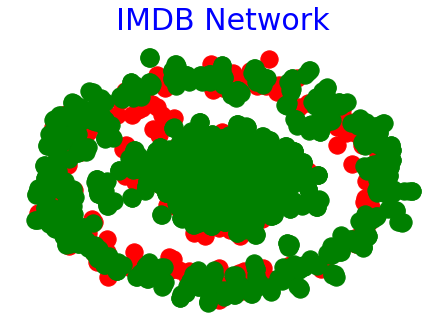

In [80]:
#visualize
nx.draw(G, nodelist = uniqueMovie, node_color = 'r')
nx.draw(G, nodelist = uniqueActors, node_color = 'g')
plt.title('IMDB Network', fontsize = 30, color = 'blue')
plt.show()

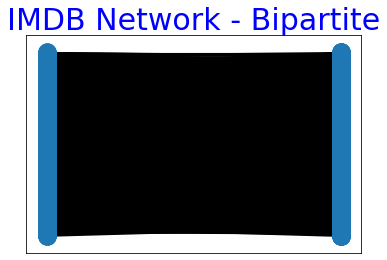

In [82]:
# create an edge view object to display connections
edges = G.edges()

# draw the graph using the bipartite layout to show connections
nx.draw_networkx(G, pos = nx.drawing.layout.bipartite_layout(G, uniqueMovie), width = 2, with_labels = False)
plt.title('IMDB Network - Bipartite', fontsize = 30, color = 'blue')
plt.show()

In [56]:
#check if the network is fully connected 
nx.is_connected(G)

False

In [57]:
#access the number of connected components
nx.number_connected_components(G)

141

In [66]:
#calculate the network density
nx.density(G)

0.000694819249623031

## Analysis
As we can see from the above outpus, our IMDB 2-mode has 3392 nodes and 3996 edges which makes it appear fairly saturated and therefore few insights can be extracted. In the first graph we color coded node types: red dots indicates the movies and green indicates the actors. The average degree centrality of this network is 2.3561 which indicates that the any node in the network is a little over two nodes away from any other node. We can also see that the graph of the network is not fully connected and therefore we cannot determine other metric such as diameter. We do see however that there are 141 fully connected subnetworks that are included in the network. We can also see that our network has a low network density which indicates that there are more potential connections between nodes than actual connections. Applying some network reduction techniques can help us gain some more in-depth understanding between nodes, clusters and cliques.

## Network Reduction: Island Method

Describe what you are doing (subsetting) how and why.

In [195]:
#generate each of the 141 connected components
nx.connected_components(G)

<generator object connected_components at 0x000001B05AB291C8>

Link to data : https://www.kaggle.com/PromptCloudHQ/imdb-data

In [153]:
result

[('Guardians of the Galaxy', 'Chris Pratt'),
 ('Prometheus', 'Noomi Rapace'),
 ('Split', 'James McAvoy'),
 ('Sing', 'Matthew McConaughey'),
 ('Suicide Squad', 'Will Smith'),
 ('The Great Wall', 'Matt Damon'),
 ('La La Land', 'Ryan Gosling'),
 ('Mindhorn', 'Essie Davis'),
 ('The Lost City of Z', 'Charlie Hunnam'),
 ('Passengers', 'Jennifer Lawrence'),
 ('Fantastic Beasts and Where to Find Them', 'Eddie Redmayne'),
 ('Hidden Figures', 'Taraji P. Henson'),
 ('Rogue One', 'Felicity Jones'),
 ('Moana', "Auli'i Cravalho"),
 ('Colossal', 'Anne Hathaway'),
 ('The Secret Life of Pets', 'Louis C.K.'),
 ('Hacksaw Ridge', 'Andrew Garfield'),
 ('Jason Bourne', 'Matt Damon'),
 ('Lion', 'Dev Patel'),
 ('Arrival', 'Amy Adams'),
 ('Gold', 'Matthew McConaughey'),
 ('Manchester by the Sea', 'Casey Affleck'),
 ('Hounds of Love', 'Emma Booth'),
 ('Trolls', 'Anna Kendrick'),
 ('Independence Day: Resurgence', 'Liam Hemsworth'),
 ('Paris pieds nus', 'Fiona Gordon'),
 ('Bahubali: The Beginning', 'Prabhas'),
 (

In [154]:
uniqueMovie

['Guardians of the Galaxy',
 'Prometheus',
 'Split',
 'Sing',
 'Suicide Squad',
 'The Great Wall',
 'La La Land',
 'Mindhorn',
 'The Lost City of Z',
 'Passengers',
 'Fantastic Beasts and Where to Find Them',
 'Hidden Figures',
 'Rogue One',
 'Moana',
 'Colossal',
 'The Secret Life of Pets',
 'Hacksaw Ridge',
 'Jason Bourne',
 'Lion',
 'Arrival',
 'Gold',
 'Manchester by the Sea',
 'Hounds of Love',
 'Trolls',
 'Independence Day: Resurgence',
 'Paris pieds nus',
 'Bahubali: The Beginning',
 'Dead Awake',
 'Bad Moms',
 "Assassin's Creed",
 'Why Him?',
 'Nocturnal Animals',
 'X-Men: Apocalypse',
 'Deadpool',
 'Resident Evil: The Final Chapter',
 'Captain America: Civil War',
 'Interstellar',
 'Doctor Strange',
 'The Magnificent Seven',
 '5- 25- 77',
 'Sausage Party',
 'Moonlight',
 "Don't Fuck in the Woods",
 'The Founder',
 'Lowriders',
 'Pirates of the Caribbean: On Stranger Tides',
 'Miss Sloane',
 'Fallen',
 'Star Trek Beyond',
 'The Last Face',
 'Star Wars: Episode VII - The Force A

In [157]:
uniqueActors

['Chris Pratt',
 'Noomi Rapace',
 'James McAvoy',
 'Matthew McConaughey',
 'Will Smith',
 'Matt Damon',
 'Ryan Gosling',
 'Essie Davis',
 'Charlie Hunnam',
 'Jennifer Lawrence',
 'Eddie Redmayne',
 'Taraji P. Henson',
 'Felicity Jones',
 "Auli'i Cravalho",
 'Anne Hathaway',
 'Louis C.K.',
 'Andrew Garfield',
 'Dev Patel',
 'Amy Adams',
 'Casey Affleck',
 'Emma Booth',
 'Anna Kendrick',
 'Liam Hemsworth',
 'Fiona Gordon',
 'Prabhas',
 'Jocelin Donahue',
 'Mila Kunis',
 'Michael Fassbender',
 'Zoey Deutch',
 'Ryan Reynolds',
 'Milla Jovovich',
 'Chris Evans',
 'Benedict Cumberbatch',
 'Denzel Washington',
 'John Francis Daley',
 'Seth Rogen',
 'Mahershala Ali',
 'Brittany Blanton',
 'Michael Keaton',
 'Gabriel Chavarria',
 'Johnny Depp',
 'Jessica Chastain',
 'Hermione Corfield',
 'Chris Pine',
 'Charlize Theron',
 'Daisy Ridley',
 'Kate Beckinsale',
 'Jennifer Aniston',
 'Keanu Reeves',
 'Christian Bale',
 'Stephen Lang',
 'Emilia Clarke',
 'Gemma Arterton',
 'Tom Hanks',
 'Ben Affleck'